### **ESTRATEGIAS DE MUESTREO EN MODELOS DE CLASIFICACION DESBALANCEADOS**


### **1.Instalación de Librerias**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Manipulación y modelado de datos SKLEARN
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### **2.Importación del caso de negocio**

In [ ]:
data = pd.read_csv('Clasificacion_picos_intensidad.csv')

### **3. Exploracion de datos**

In [ ]:
data.head()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,319,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,320,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [ ]:
data.columns

Index(['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos',
       'Potencia', 'F80', 'Brazo', 'picos_intens'],
      dtype='object')

In [ ]:
data.describe()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,8112.488348,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,4274.733801,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,316.000000,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,4463.500000,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,8168.000000,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,11818.500000,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,15419.000000,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [ ]:
# Dimensiones de la tabla de modelamiento (fila, Columna)
data.shape

(14375, 9)

In [ ]:
# Detección del desbalance de la muestras
data.groupby('picos_intens').size()

picos_intens
0.0    12868
1.0     1507
dtype: int64

Class 0 Buen_Estado: 12868
Class 1 Fallo: 1507
Proporción: 8.54 : 1


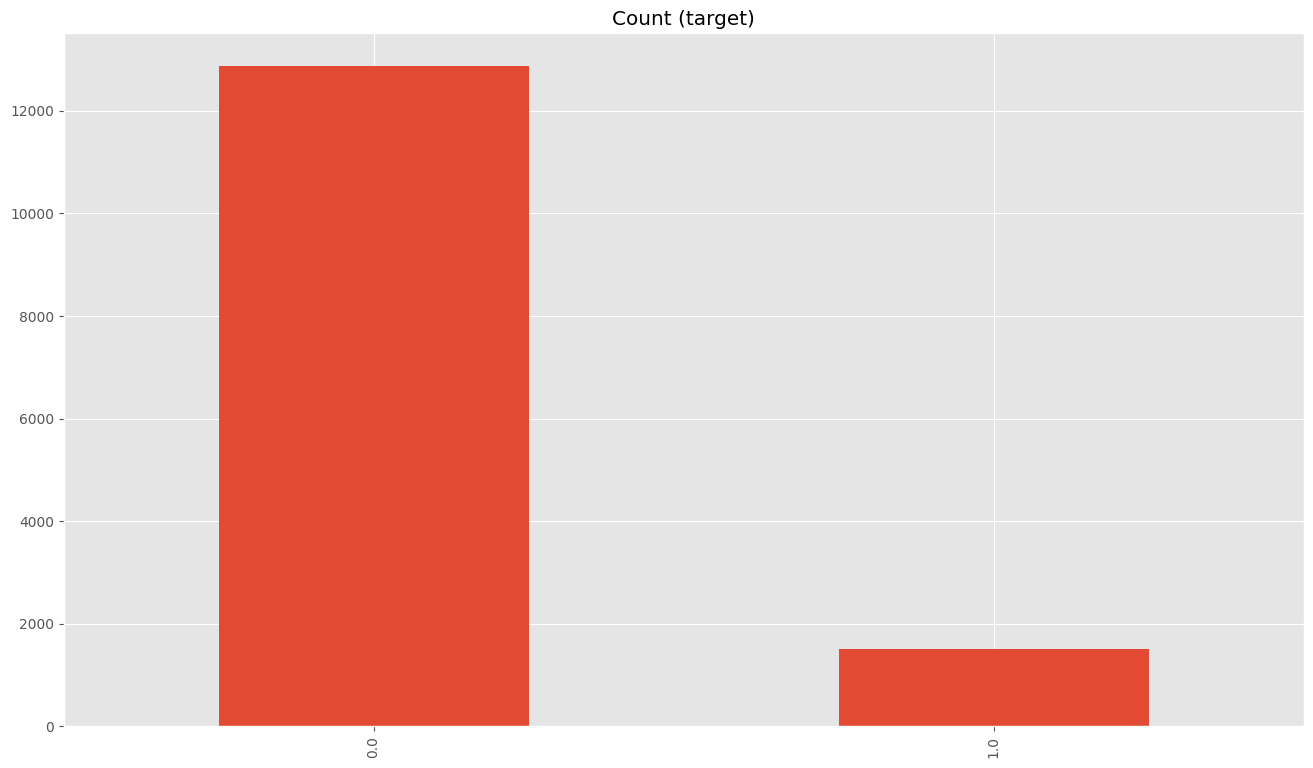

In [ ]:
# Detección del desbalance de la muestras
target_count = data.picos_intens.value_counts()
print('Class 0 Buen_Estado:', target_count[0])
print('Class 1 Fallo:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [ ]:
data.columns

Index(['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos',
       'Potencia', 'F80', 'Brazo', 'picos_intens'],
      dtype='object')

In [ ]:
data.head(3)

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0


In [ ]:
# Se debe hacer el filtrado previo y definir las vaariables que tengan
# un impacto sobre el target. Variables que tengan mayor capacidad de relacionarse
# (Se aplica la correlación )
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = data[['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo']]
y = data[['picos_intens']]

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=1206)

### **5. Estrategias de Muestreo Oversampling y Under Sampling**


In [ ]:
# Solo utilizaremos Datos de entrenamiento para la estrategia
df_train = pd.concat([X_train,y_train],axis=1)

In [ ]:
df_train.head(3)

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
10397,11432,5936.66,3198.43,8.86,75.66,12374.88,73.19,2.36,0.0
3121,3964,6101.57,3099.47,8.83,75.12,10660.38,58.67,1.98,1.0
627,1284,6195.24,2709.75,9.33,70.09,15359.98,75.09,2.66,0.0


In [ ]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = df_train.picos_intens.value_counts()

# Divide by class
df_class_0 = df_train[df_train['picos_intens'] == 0]
df_class_1 = df_train[df_train['picos_intens'] == 1]

In [ ]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(8365, 8365, 978, 978)

**UnderSampling**

In [ ]:
# Sample es como el head pero aleatorio
df_class_0.sample(3)

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
5207,6120,5991.45,2586.97,8.58,76.25,11364.31,63.20,2.21,0.0
2751,3579,5793.15,2806.05,8.59,79.59,9229.86,72.08,1.86,0.0
2379,3176,5971.77,3009.28,9.33,73.09,13535.75,82.17,2.44,0.0


Estrategia de Muestreo under-sampling:
0.0    978
1.0    978
Name: picos_intens, dtype: int64


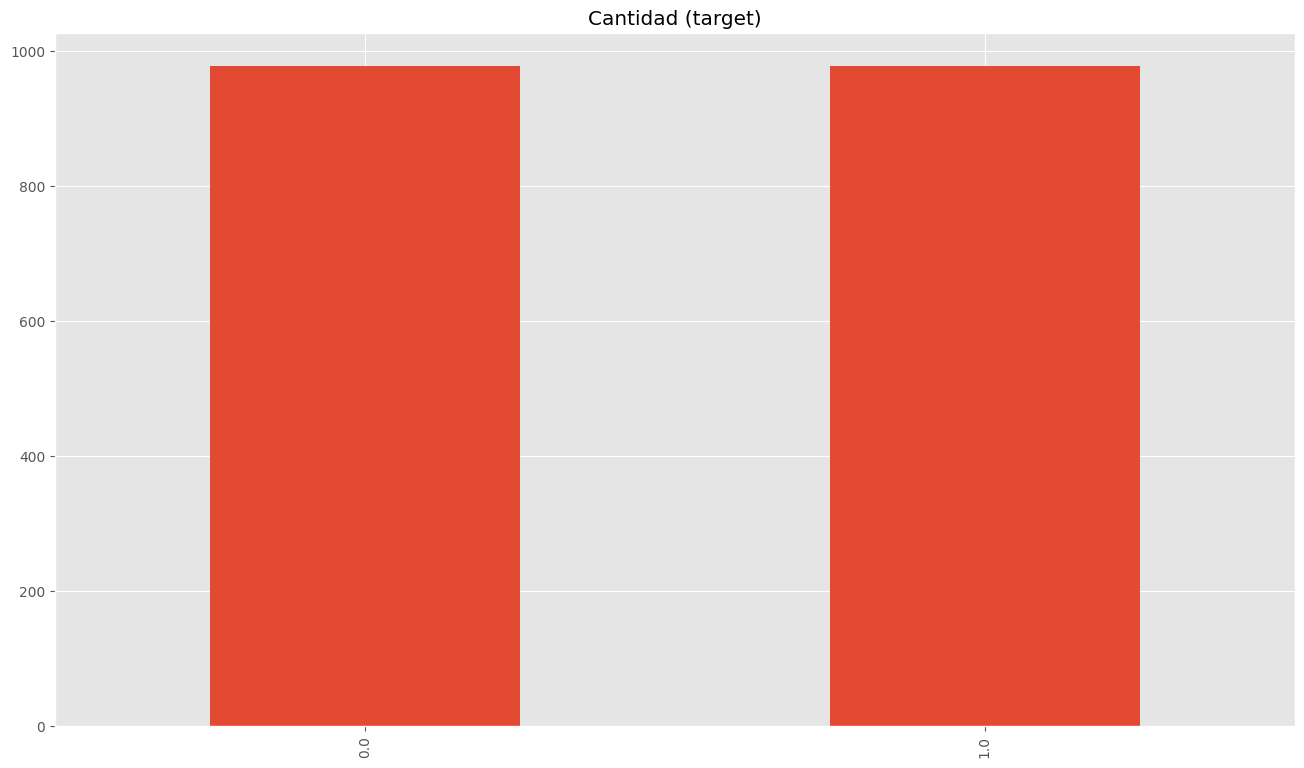

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=1206)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_train_under.picos_intens.value_counts())

df_train_under.picos_intens.value_counts().plot(kind='bar', title='Cantidad (target)');

**OverSampling**

In [ ]:
# Ejemplo de replicación de datos
aux = df_class_1.head(2)
aux.sample(3,replace=True)

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
5485,6407,6018.74,3631.47,8.72,74.41,10572.53,57.01,2.01,1.0
5485,6407,6018.74,3631.47,8.72,74.41,10572.53,57.01,2.01,1.0
3121,3964,6101.57,3099.47,8.83,75.12,10660.38,58.67,1.98,1.0


Random over-sampling:
0.0    8365
1.0    8365
Name: picos_intens, dtype: int64


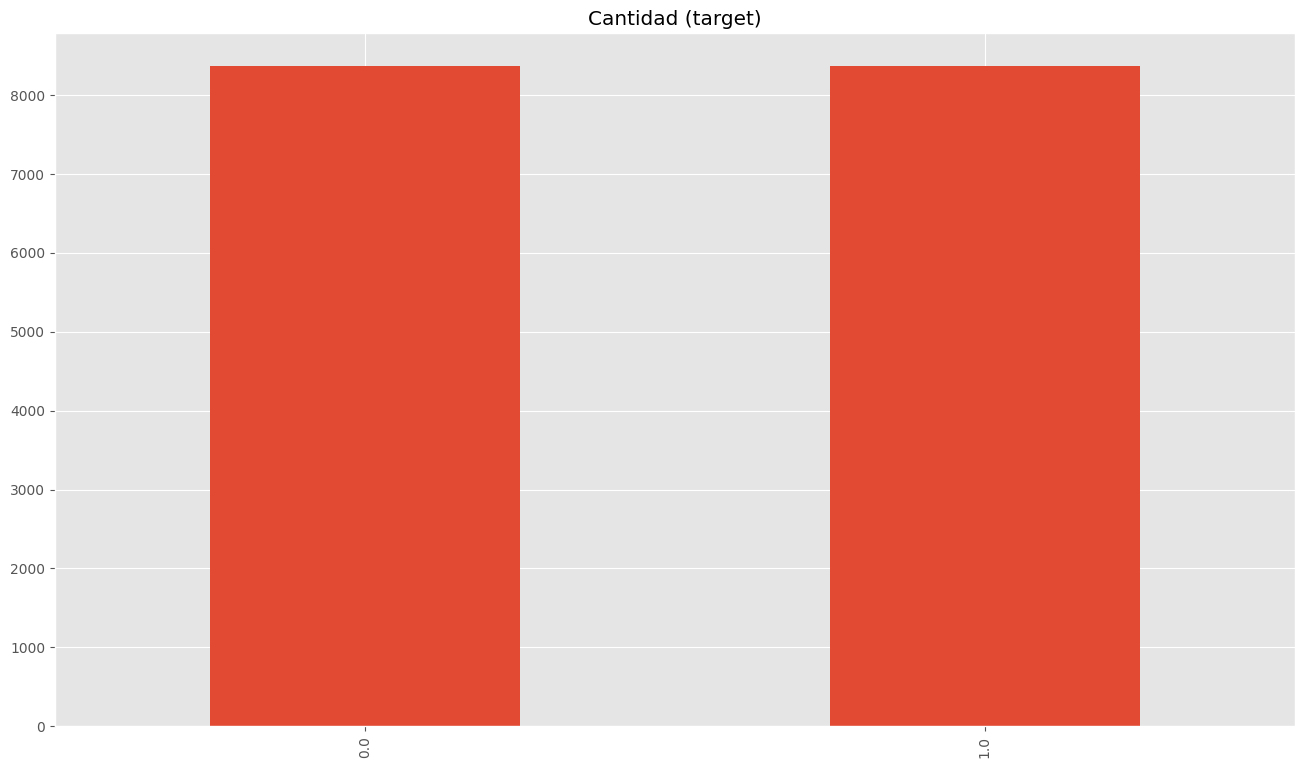

In [ ]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.picos_intens.value_counts())

df_train_over.picos_intens.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
#df_train.head(3)
df_train.picos_intens.value_counts()

0.0    8365
1.0     978
Name: picos_intens, dtype: int64

In [ ]:
#df_train_under.head(3)
df_train_under.picos_intens.value_counts()

0.0    978
1.0    978
Name: picos_intens, dtype: int64

In [ ]:
#df_train_over.head(3)
df_train_over.picos_intens.value_counts()

0.0    8365
1.0    8365
Name: picos_intens, dtype: int64

### **6.Evaluación de resultados de las estrategias de muestreo**

# Modelo de Clasificación utilizado es el arbol, es posible utilizar otros modelo de clasificación revisar en la parte final


**DATOS ORIGINALES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 96.24%
Log Loss: 1.3537858685499091


Matriz de Confusión - DATOS ORIGINALES:
 [[4391  112]
 [  96  433]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4503
         1.0       0.79      0.82      0.81       529

    accuracy                           0.96      5032
   macro avg       0.89      0.90      0.89      5032
weighted avg       0.96      0.96      0.96      5032



<ipython-input-30-cd695b5c7927>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-30-cd695b5c7927>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


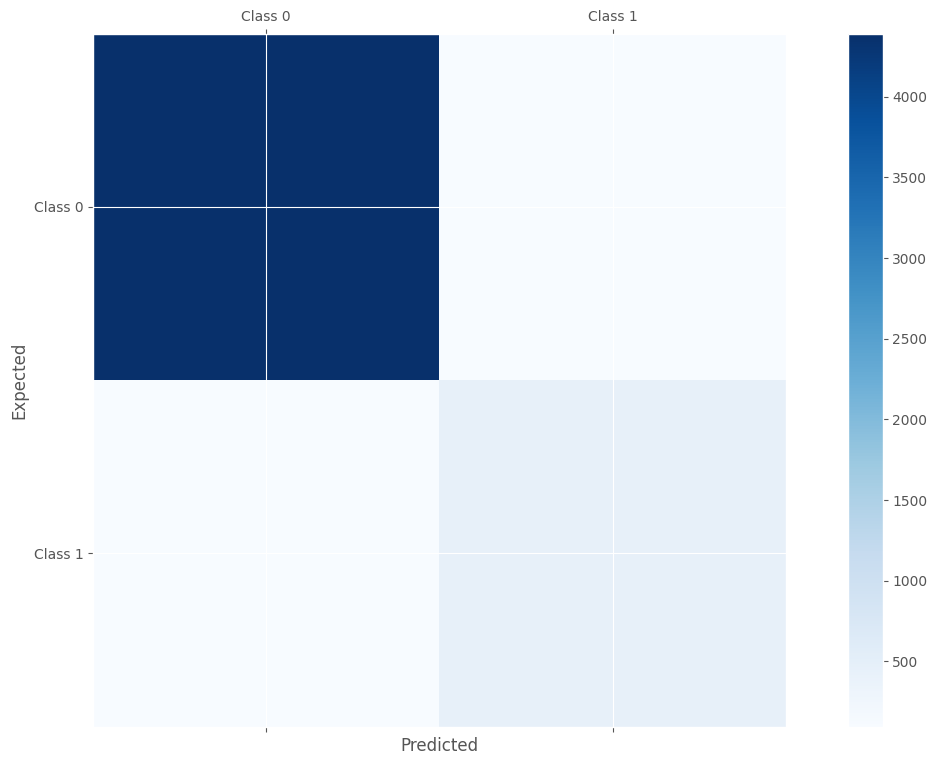

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------
# CON TRAIN ORIGINAL
print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#433: son los casos que el modelo coincide con el valor real
#96: son los casos que el modelo no tuvo la capacidad de asignar correctamente el 1
#112: son los casos que el modelo etiqueto como 1 pero se equivocó

**UNDER SAMPLING**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_u= df_train_under[['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo']]
y_train_u = df_train_under[['picos_intens']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 91.55%
Log Loss: 3.044227482188949


Matriz de Confusión UNDERSAMPLING:
 [[4122  381]
 [  43  486]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      4503
         1.0       0.56      0.92      0.70       529

    accuracy                           0.92      5032
   macro avg       0.78      0.92      0.82      5032
weighted avg       0.94      0.92      0.92      5032



<ipython-input-27-73540b3e6ad4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-27-73540b3e6ad4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


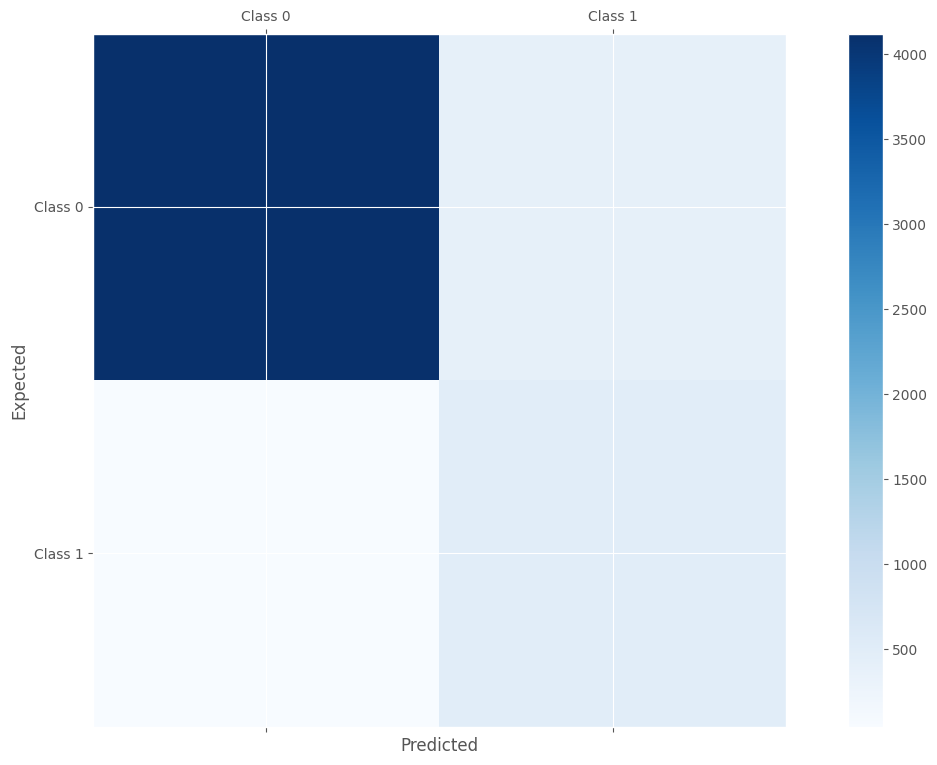

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**OVER SAMPLING**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_o= df_train_over[['Unnamed: 0', 'Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo']]
y_train_o = df_train_over[['picos_intens']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 95.97%
Log Loss: 1.4540663032573098


Matriz de Confusión OVERSAMPLING:
 [[4391  112]
 [  96  433]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4503
         1.0       0.79      0.82      0.81       529

    accuracy                           0.96      5032
   macro avg       0.89      0.90      0.89      5032
weighted avg       0.96      0.96      0.96      5032



<ipython-input-29-a80f9b956ac6>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-29-a80f9b956ac6>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


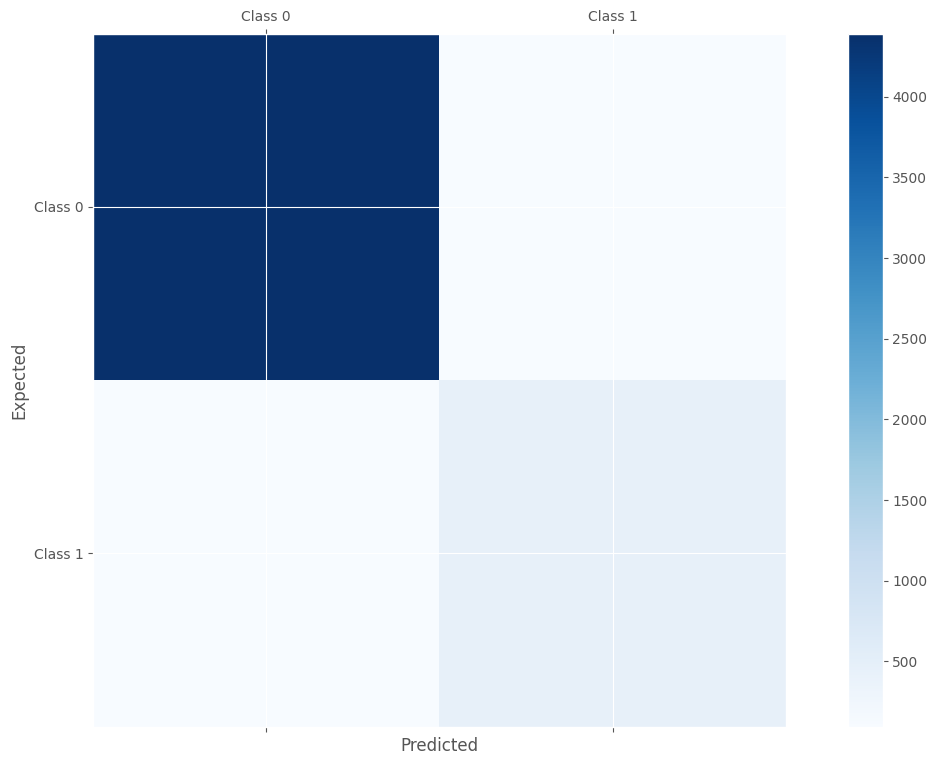

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**SMOTE**

# Referencias de investigación
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets